In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
all_months_data = pd.DataFrame()
files = [file for file in os.listdir('../sliders/08 Lesson Sales Analysis/Sales_Data') ]
for file in files:
    df = pd.read_csv("../sliders/08 Lesson Sales Analysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


In [15]:
all_months_data.to_csv('../sliders/08 Lesson Sales Analysis/Sales_Data/all_data.csv', index=False)

In [4]:
all_data = pd.read_csv('../sliders/08 Lesson Sales Analysis/Sales_Data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


In [18]:
non_df = all_data[all_data.isna().any(axis=1)]
non_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


In [20]:
all_data =  all_data.dropna(how='all')

In [21]:
all_data.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
186847,False,False,False,False,False,False,True
186848,False,False,False,False,False,False,True
186849,False,False,False,False,False,False,True
186850,False,False,False,False,False,False,True


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186852 entries, 0 to 186851
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  186305 non-null  object 
 3   Price Each        186305 non-null  object 
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Unnamed: 0        0 non-null       float64
dtypes: float64(1), object(6)
memory usage: 10.0+ MB


In [25]:
temp = all_data[all_data['Order Date'].str[0:2]=='OR']
temp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0


In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186851
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Unnamed: 0        0 non-null       float64
dtypes: float64(3), object(4)
memory usage: 11.4+ MB


In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12


In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186852 entries, 0 to 186851
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Unnamed: 0        0 non-null       float64
 7   Month             186305 non-null  object 
dtypes: float64(3), object(5)
memory usage: 11.4+ MB


In [19]:
all_data['Month'] = all_data['Month'].astype('Int32')

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186852 entries, 0 to 186851
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Unnamed: 0        0 non-null       float64
 7   Month             185950 non-null  Int32  
dtypes: Int32(1), float64(3), object(4)
memory usage: 10.9+ MB


In [21]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95


In [23]:
all_data['Sales'].sum()

34492035.97

In [24]:
month = all_data['Month']
month.value_counts()

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: Int64

In [25]:
best_month_for_sales = all_data.groupby('Month').sum()
best_month_for_sales

,Quantity Ordered,Price Each,Unnamed: 0,Sales
Month,,,,
1,10903.0,1.811768e+06,0.0,1.822257e+06
2,13449.0,2.188885e+06,0.0,2.202022e+06
3,17005.0,2.791208e+06,0.0,2.807100e+06
4,20558.0,3.367671e+06,0.0,3.390670e+06
5,18667.0,3.135125e+06,0.0,3.152607e+06
6,15253.0,2.562026e+06,0.0,2.577802e+06
7,16072.0,2.632540e+06,0.0,2.647776e+06
8,13448.0,2.230345e+06,0.0,2.244468e+06
9,13109.0,2.084992e+06,0.0,2.097560e+06


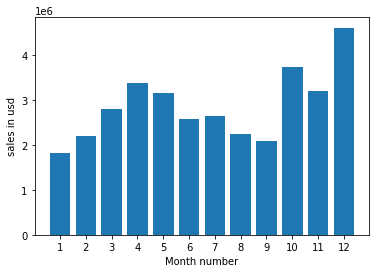

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
months = range(1,13)
plt.bar(months, best_month_for_sales['Sales'])
plt.xticks(months)
plt.ylabel('sales in usd')
plt.xlabel('Month number')
plt.show()

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95


# What city could be the most product

In [28]:
all_data.groupby(['Purchase Address']).sum()

,Quantity Ordered,Price Each,Unnamed: 0,Month,Sales
Purchase Address,,,,,
"1 11th St, Atlanta, GA 30301",1.0,11.95,0.0,3,11.95
"1 11th St, Los Angeles, CA 90001",1.0,1700.00,0.0,10,1700.00
"1 11th St, San Francisco, CA 94016",1.0,700.00,0.0,9,700.00
"1 12th St, Los Angeles, CA 90001",1.0,150.00,0.0,3,150.00
"1 12th St, New York City, NY 10001",1.0,11.99,0.0,10,11.99
...,...,...,...,...,...
"999 Wilson St, Los Angeles, CA 90001",1.0,999.99,0.0,9,999.99
"999 Wilson St, New York City, NY 10001",1.0,150.00,0.0,2,150.00
"999 Wilson St, Portland, OR 97035",1.0,2.99,0.0,5,2.99


In [30]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

for city in all_data['Purchase Address']:
    all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(city)}  ({get_state(city)})")
# all_data['City'] = get_city(all_data[all_data['Purchase Address']])
# all_data['City'] = get_state("1 11th St, Atlanta, GA 30301")
# "1 11th St, Atlanta, GA 30301".split(",")[1].strip(" ")
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

IndexError: list index out of range

In [99]:
all_data['Purchase Address']

0         136 Church St, New York City, NY 10001
1            562 2nd St, New York City, NY 10001
2           277 Main St, New York City, NY 10001
3            410 6th St, San Francisco, CA 94016
4                  43 Hill St, Atlanta, GA 30301
                           ...                  
186847             795 Pine St, Boston, MA 02215
186848     495 North St, New York City, NY 10001
186849     319 Ridge St, San Francisco, CA 94016
186850      916 Main St, San Francisco, CA 94016
186851            209 11th St, Atlanta, GA 30301
Name: Purchase Address, Length: 186305, dtype: object

In [ ]:
# def get_city(address):
#     return address.split(",")[1].strip(" ")

# def get_state(address):
#     return address.split(",")[2].split(" ")
# get_city(all_data['Purchase Address'])

# all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

In [31]:
all_data.groupby('City').sum()['Sales']

City
San Francisco  (CA)    3.449204e+07
Name: Sales, dtype: float64

In [35]:
# for hour in all_data['Order Date']:
#     print(pd.to_datetime(hour, dayfirst=True, errors='coerce'))
all_data['Hour'] = pd.to_datetime(all_data['Order Date'], dayfirst=True, errors='coerce').dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date'], dayfirst=True, errors='coerce').dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00,San Francisco (CA),0.0,1.0
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00,San Francisco (CA),7.0,3.0
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95,San Francisco (CA),18.0,21.0
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99,San Francisco (CA),15.0,13.0
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95,San Francisco (CA),12.0,38.0


In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186852 entries, 0 to 186851
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Unnamed: 0        0 non-null       float64
 7   Month             185950 non-null  Int32  
 8   Sales             185950 non-null  float64
 9   City              186852 non-null  object 
 10  Hour              185950 non-null  float64
dtypes: Int32(1), float64(5), object(5)
memory usage: 15.1+ MB


In [54]:
# all_data['Count'] = 1
all_data['Hour'] = pd.to_numeric(all_data['Hour'], errors='coerce')
all_data['Hour'] = all_data['Hour'].astype('Int32')

all_data['Minute'] = pd.to_numeric(all_data['Minute'], errors='coerce')
all_data['Minute'] = all_data['Minute'].astype('Int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00,San Francisco (CA),0,1,1
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00,San Francisco (CA),7,3,1
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95,San Francisco (CA),18,21,1
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95,San Francisco (CA),12,38,1


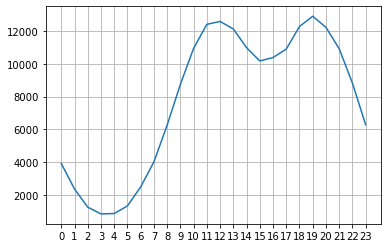

In [56]:
keys = [pair for pair, df in all_data.groupby('Hour')]
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

In [63]:
# all_data.groupby(['Hour']).count()['Count']
all_data.sort_values(['Hour', 'Count'], ascending=False).groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,0,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,0,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,0,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,0,831,831,831,831,831
4,854,854,854,854,854,854,0,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,0,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,0,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,0,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,0,6256,6256,6256,6256,6256


# What products are most sold together

In [71]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Hour,Minute,Count
16,295681,Google Phone,1.0,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,600.00,San Francisco (CA),12,37,1
17,295681,USB-C Charging Cable,1.0,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,11.95,San Francisco (CA),12,37,1
18,295681,Bose SoundSport Headphones,1.0,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,99.99,San Francisco (CA),12,37,1
19,295681,Wired Headphones,1.0,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,11.99,San Francisco (CA),12,37,1
36,295698,Vareebadd Phone,1.0,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",NaN,12,400.00,San Francisco (CA),14,32,1


In [73]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

ValueError: Length mismatch: Expected axis has 15004 elements, new values have 15551 elements

In [74]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00,San Francisco (CA),0,1,1
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00,San Francisco (CA),7,3,1
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95,San Francisco (CA),18,21,1
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95,San Francisco (CA),12,38,1
